In [1]:
# So what questions do I have so far?
# 1. Should I use rho(r) to find r_s (so after long debate with my self I say no because does not help) [turns out yes! cause it makes better graphs]
# 2. Should I use V(r) to find V_200 and C_200 (better find r_s and C200  {actually better to find V_200, see pont 1})
# 3. If 1 and 2 then I get two values for r_s (yeah how different are they?)
# 4. it seems that r_s obtained from rho(r) is more presize 
# 5. Should I find r_200 just from rho_enc (probably not [don't think so any more])
# 6. should I find M_200 from mass profile from paper or by using mass_enc (assume paper [yeah paper, coz than  you could just use rho_200 but professor told to fit   the halos)

In [2]:
import time
import pynbody as pyn
import scipy, numpy, DM_Profiles, os
from matplotlib import pylab as plt
s = pyn.load('/media/tengiz/81498267-fb7c-4587-88ea-5c63aaf2cb66/Pynbody/testdata/g15784.lr.01024.gz')
s.physical_units()
h = s.halos()
# rho_crit = pyn.analysis.cosmology.rho_crit(s)
# H = float(pyn.analysis.cosmology.H(s))
# tmass = h[1]['mass'].sum()

In [3]:
def halos_CM(halo, to_graph = False, to_save = False):
    # well this is very poorely written | not anymore
#     modes = ['hyb', 'ssc', 'com','pot']
    output = ()
    with pyn.analysis.angmom.faceon(h[halo], cen_size  =  '10 kpc'):
        r_200 = pyn.analysis.halo.virial_radius(h[halo], overden = 200)
        output = halos_exec(halo, r_200,to_graph, to_save)
#     try: 
#         with pyn.analysis.angmom.faceon(h[halo], cen_size  =  '10 kpc'):
#             output = halos_exec(halo, to_graph, to_save)  
#     except (ValueError, RuntimeError):
#         print('faceon has failed, trying backup')
#         try:
#             with pyn.analysis.halo.center(h[halo], vel = False, cen_size = '10 kpc'):
#                 output = halos_exec(halo, to_graph, to_save)
# #                     pyn.plot.image(halo.g, width=1000, cmap='Blues')
#         except (ValueError, RuntimeError):
#             output = 'failure'
# #             pyn.plot.image(halo.g, width=100, cmap='Blues')
        
        '''
        this is for the case  if you need other centerings
        for i in range(5):
            if i == 4:
                print('all backups have failed')
                try:
                    with pyn.analysis.halo.center(halo, mode = modes[3], vel = False, cen_size = '20 kpc'):
                        output = halos_exec(halo, to_graph)
                        break
    #                     pyn.plot.image(halo.g, width=1000, cmap='Blues')
                except ValueError:
                    output = 'failure'
                    break
            try:
                with pyn.analysis.halo.center(halo, mode = modes[i], vel = True, cen_size = '20 kpc'):
                    pyn.analysis.angmom.faceon(halo, cen =  halo['pos'][0], vel = halo['vel'][0])
                    output = halos_exec(halo, to_graph)
#                     pyn.plot.image(halo.g, width=1000, cmap='Blues')
                break
            except (ValueError, RuntimeError):
                print(modes[i] + ' backup has failed')
        '''

    return output

In [4]:
def halos_exec(halo, r_200, to_graph = False, to_save = False):
    #takes in halo and boolean whether to graph 
    # outputs mass and concentration
    p = pyn.analysis.profile.Profile(h[halo], min = 2*max(h[halo]['eps']), max = r_200, ndim = 3, type = 'log', nbins = 20)
    print(2*max(h[halo]['eps']), r_200)
    radii = p['rbins']
    den = p['density']
    vel = p['v_circ']
    hp = DM_Profiles.DM_Profile(radii, den, vel, s, halo, r_200)
    hp.fits_pISO() 
    output = hp.pISO()
    if to_graph:
        den_plot(hp, to_save)
        vel_plot(hp, to_save)
        
    return output

In [5]:
# den plot
def den_plot(halo_profile, to_save):
    # takes radii, den, param and DM_Profile object from DM_Profiles and outputs den profile with p_ISO curve_fit
    import DM_Profiles
    from matplotlib import pylab as plt
    fig, ax = plt.subplots() 
    ax.loglog(halo_profile.radii, numpy.power(halo_profile.den, 10), 'g--')
    ax.loglog(halo_profile.radii, numpy.power(halo_profile.rho_pISO(halo_profile.radii, *halo_profile.param), 10), 'r-')
    ax.grid()
    ax.legend(('data','fit'))
    ax.set_title('halo_' +  str(halo_profile.number) + ' density profile')
    ax.set_xlabel('$R$ [kpc]')
    ax.set_ylabel(r'$\rho_{pISO}$ [M$_{\odot}$ /kpc$^{3}$]')
    if to_save:
        plt.savefig('../Graphs/density_plot' + str(halo_profile.number) +  '.jpg')
    plt.show()

#     halo_profile.chisq_pISO()
#     print(halo_profile.den_chisq)

In [6]:
# vel plot
def vel_plot(halo_profile, to_save):
    # takes radii, den, param and DM_Profile object from DM_Profiles and outputs vel profile with p_ISO curve_fit
    import DM_Profiles
    from matplotlib import pylab as plt
    fig1, ax1 = plt.subplots()
    ax1.plot(halo_profile.radii, halo_profile.vel, 'g--')
    ax1.plot(halo_profile.radii, halo_profile.V_pISO(halo_profile.radii), 'r-')
    ax1.grid()
    ax1.legend(('data','fit'))
    ax1.set_title('halo_' +  str(halo_profile.number) + ' velocity rotation curve')
    ax1.set_xlabel('$R$ [kpc]')
    ax1.set_ylabel('V$_{pISO}$ [km/s] ')
    if to_save:
        plt.savefig('../Graphs/velocity_plot' + str(halo_profile.number) + '.jpg')
    plt.show()

#     halo_profile.chisq_pISO()
#     print(halo_profile.vel_chisq)

/home/tengiz/.local/lib/python3.6/site-packages/pynbody/array.py:865: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return self.base[self._reexpress_index(item)]
pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane


1.2500009494047732 384.9563774488248


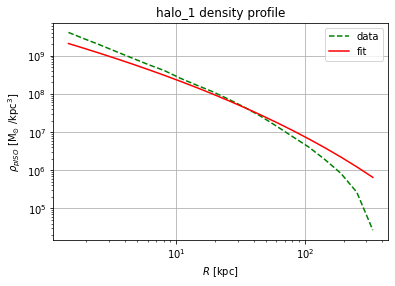

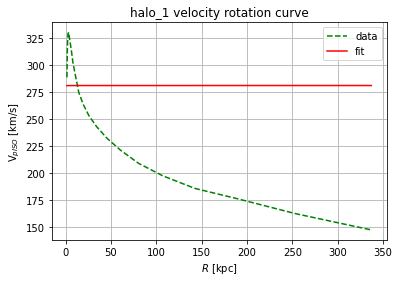

halo number 1 is done


/home/tengiz/.local/lib/python3.6/site-packages/pynbody/array.py:865: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return self.base[self._reexpress_index(item)]
pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane


8.000005876849102 738.3867990876079


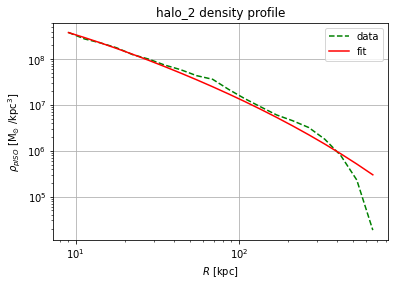

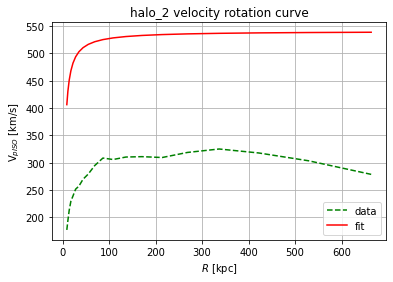

halo number 2 is done


/home/tengiz/.local/lib/python3.6/site-packages/pynbody/array.py:865: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return self.base[self._reexpress_index(item)]
pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane


4.000002938424551 412.2015933928122


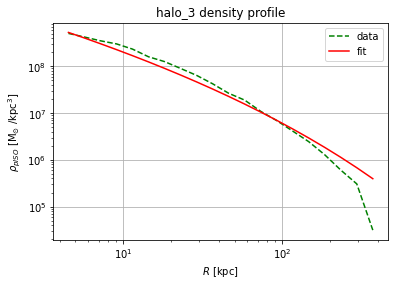

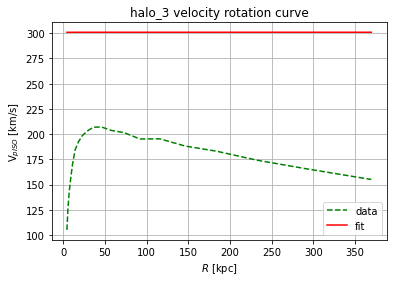

halo number 3 is done


/home/tengiz/.local/lib/python3.6/site-packages/pynbody/array.py:865: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return self.base[self._reexpress_index(item)]
pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane


2.5000018988095465 220.18986664661122


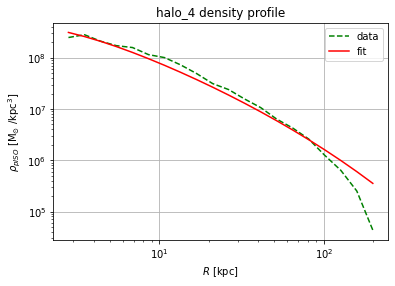

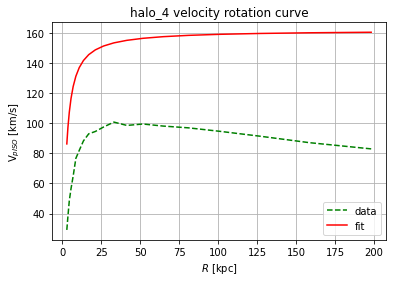

halo number 4 is done
[(5688862855.635804, SimArray(397503.84840547, '1.00e+00'), array([1.48979352e+01, 9.68434341e-04])), (901671154883.4374, SimArray(231.40700594, '1.00e+00'), array([8.16340274, 3.19085758])), (4492373238.1849165, SimArray(448531.74977689, '1.00e+00'), array([1.48374207e+01, 9.19002041e-04])), (42221011795.89536, SimArray(98.00995428, '1.00e+00'), array([7.47958767, 2.24660718]))]
37.497196197509766


In [7]:
start_time = time.time()
CM =[]
for halo in range(1, 5):
    CM.append(halos_CM(halo, to_graph = True, to_save = True))
    print('halo number ' + str(halo) + ' is done')
print(CM)
print(time.time() - start_time)